In [1]:
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Keras modules

In [4]:
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Sequential
from keras.layers.core import Dense, Flatten, Activation
from keras.layers import Conv2D, AveragePooling2D, BatchNormalization, Dropout, MaxPooling2D

Using TensorFlow backend.


## Cargo datos

In [5]:
from keras.datasets import cifar10
((x, y), (x_test,y_test)) = cifar10.load_data()

In [6]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.1)

## Paso a float

In [7]:
x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_valid /= 255
x_test /= 255

In [8]:
y_train_categorical = to_categorical(y_train)
y_val_categorical = to_categorical(y_valid)

## Red neuronal: CNN tipo AlexNet

In [9]:
model = Sequential()

model.add(Conv2D(filters=20, kernel_size=(11, 11), input_shape=(32,32,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=20, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=20, kernel_size=(5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())


model.add(Conv2D(filters=20, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(units=120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=84, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 20)        7280      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 20)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 20)        3620      
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 20)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 20)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 20)          10020     
__________

In [11]:
# Callbacks
earlystop = EarlyStopping(monitor='val_acc', min_delta=0, patience=5, verbose=2)
checkpointer = ModelCheckpoint(filepath='checkpoint.cifar10-cnn-tipoAlexNet.hdf5', verbose=1, save_best_only=True)

In [12]:
x_train.shape

(45000, 32, 32, 3)

In [13]:
y_train_categorical.shape

(45000, 10)

In [14]:
batch_size = 64
epocs = 100

history = model.fit(x_train, 
        y_train_categorical,
        epochs=epocs, batch_size=batch_size, 
        verbose=2, 
        validation_data = (x_valid, y_val_categorical),
        callbacks=[checkpointer, earlystop],
    )

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
 - 7s - loss: 1.9838 - acc: 0.2508 - val_loss: 1.7636 - val_acc: 0.3560

Epoch 00001: val_loss improved from inf to 1.76358, saving model to checkpoint.cifar10-cnn-tipoAlexNet.hdf5
Epoch 2/100
 - 6s - loss: 1.7054 - acc: 0.3666 - val_loss: 1.5685 - val_acc: 0.4286

Epoch 00002: val_loss improved from 1.76358 to 1.56847, saving model to checkpoint.cifar10-cnn-tipoAlexNet.hdf5
Epoch 3/100
 - 5s - loss: 1.5831 - acc: 0.4188 - val_loss: 1.4627 - val_acc: 0.4696

Epoch 00003: val_loss improved from 1.56847 to 1.46268, saving model to checkpoint.cifar10-cnn-tipoAlexNet.hdf5
Epoch 4/100
 - 5s - loss: 1.5119 - acc: 0.4500 - val_loss: 1.4514 - val_acc: 0.4712

Epoch 00004: val_loss improved from 1.46268 to 1.45136, saving model to checkpoint.cifar10-cnn-tipoAlexNet.hdf5
Epoch 5/100
 - 5s - loss: 1.4564 - acc: 0.4729 - val_loss: 1.3707 - val_acc: 0.5076

Epoch 00005: val_loss improved from 1.45136 to 1.37070, saving model to checkpoint

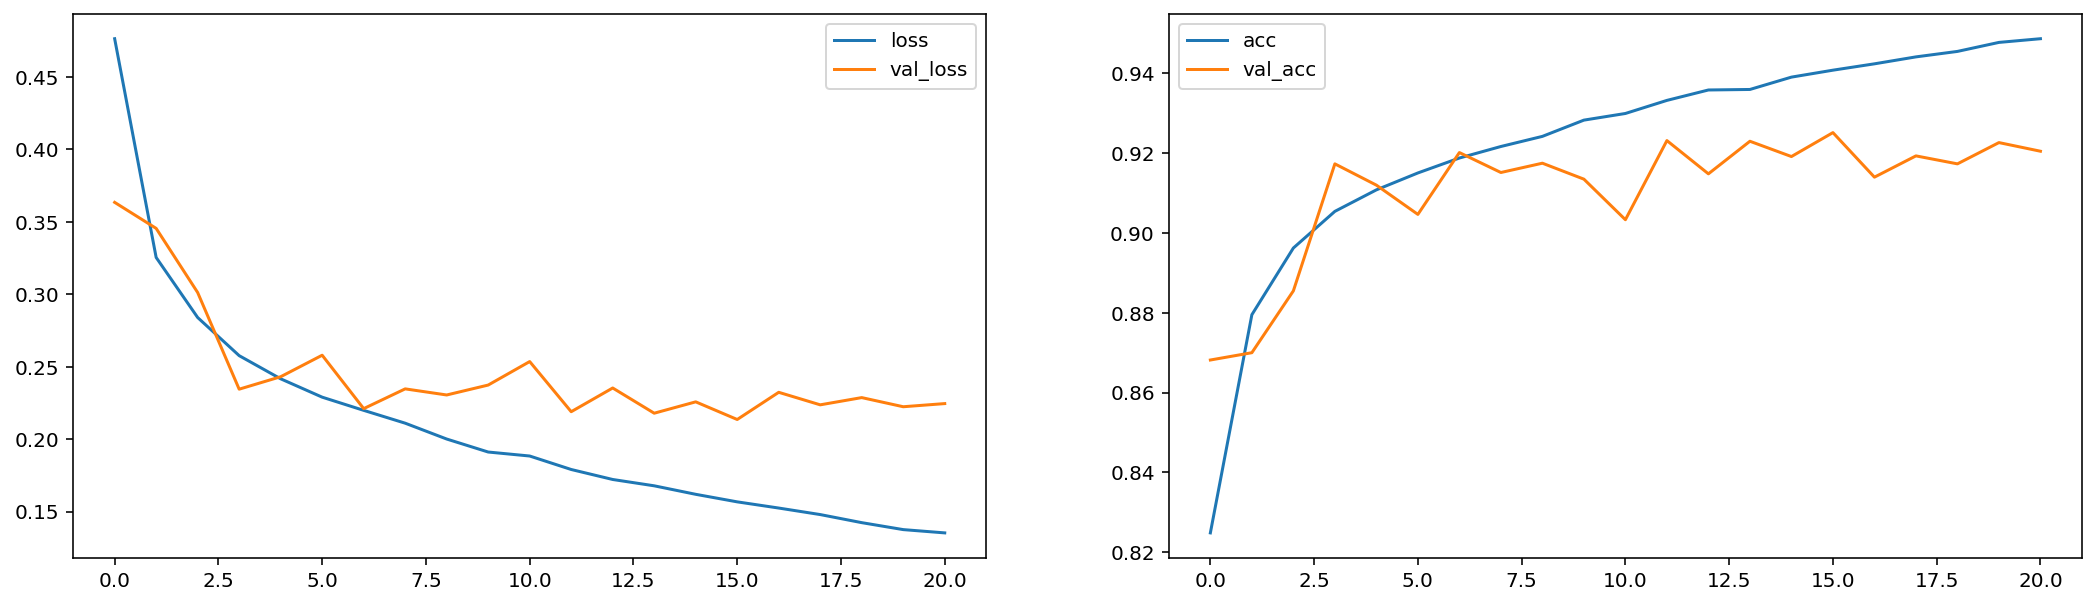

In [45]:
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(18,5))
ax1.plot(history.history['loss'], label="loss")
ax1.plot(history.history['val_loss'], label="val_loss")
ax1.legend()

ax2.plot(history.history['acc'], label="acc")
ax2.plot(history.history['val_acc'], label="val_acc")
ax2.legend()
plt.show();

In [46]:
model.load_weights('checkpoint.mnist-cnn.hdf5')